In [2]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import tensorflow as tf
from tensorflow import keras
import warnings
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargando los datos
df_white = pd.read_csv('winequality-white.csv',delimiter=";")

In [4]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

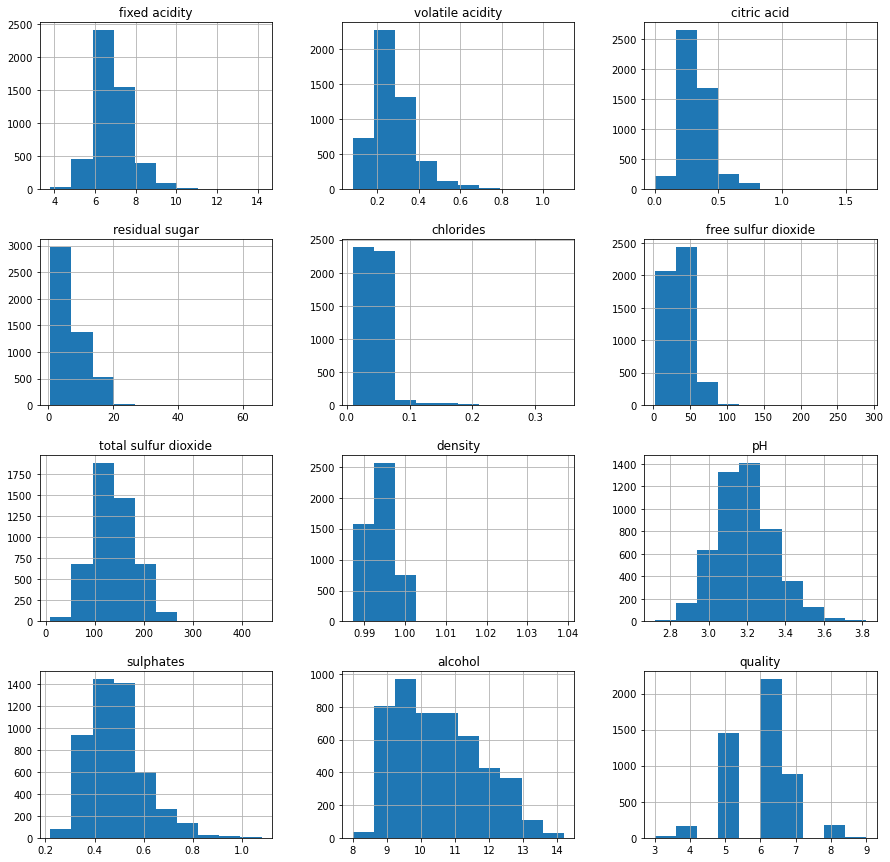

In [6]:
df_white.hist(figsize = (15,15))

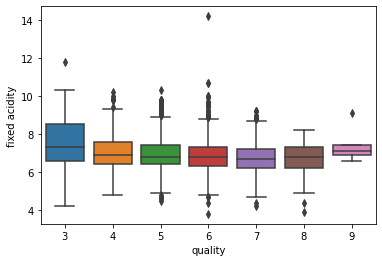

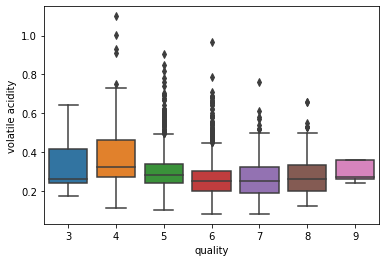

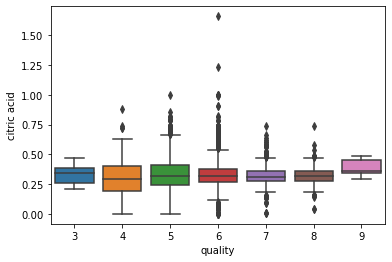

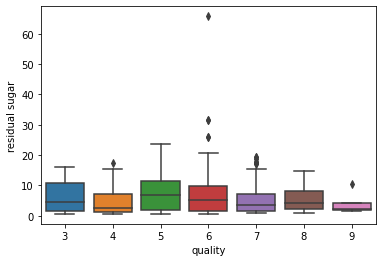

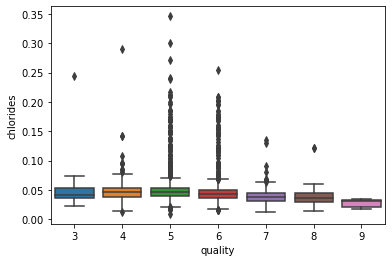

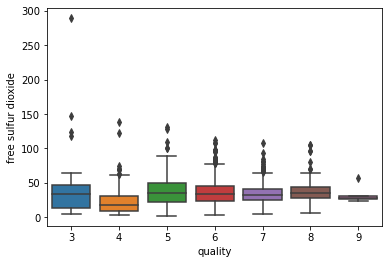

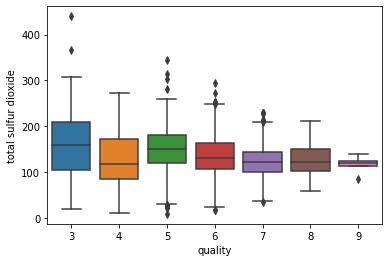

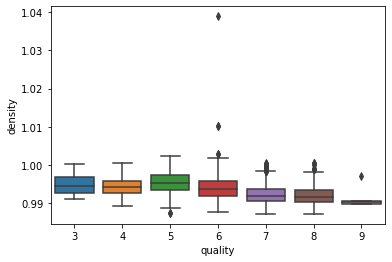

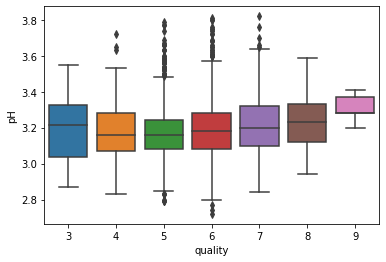

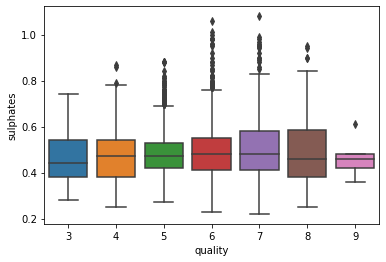

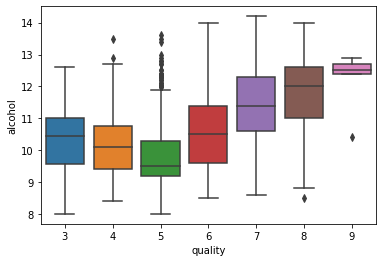

In [7]:
features = df_white.columns
for i in range(1,12):
    sns.boxplot(x='quality', y=features[i-1], data=df_white)
    plt.show()

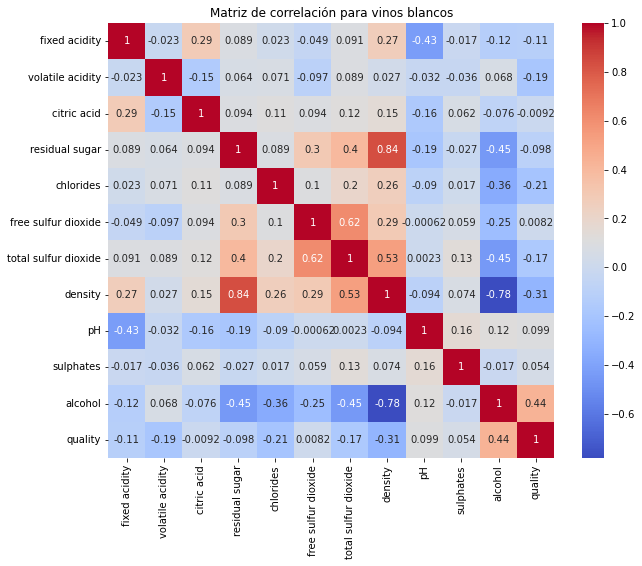

In [8]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_red = df_white.corr()
sns.heatmap(correlation_red, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación para vinos blancos")
plt.show()

# Preprocesamiento de datos

In [9]:
# Función para categorizar la calidad
def categorize_quality(quality):
    if quality < 5:
        return 'LowQuality'
    elif quality == 5:
        return 'Average'
    else:
        return 'HighQuality'


In [10]:
# Aplicamos la función a los datasets
df_white['quality'] = df_white['quality'].apply(categorize_quality)

In [11]:
# Codificando las etiquetas
le = LabelEncoder()
df_white['quality'] = le.fit_transform(df_white['quality'])

1    66.516946
0    29.746835
2     3.736219
Name: quality, dtype: float64


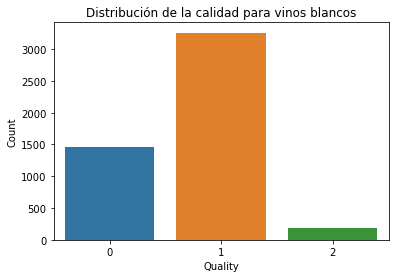

In [12]:
total_samples = len(df_white)
label_counts = df_white['quality'].value_counts()
label_proportions = label_counts / total_samples * 100
print(label_proportions)
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=df_white)
plt.title("Distribución de la calidad para vinos blancos")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

In [13]:
minority_classes = [0,2]

In [14]:
minority_data = df_white[df_white['quality'].isin(minority_classes)]
majority_data = df_white[~df_white['quality'].isin(minority_classes)]

In [15]:
n_samples_majority = len(majority_data)

In [16]:
oversampled_data = pd.concat([
    minority_data[minority_data['quality'] == cls].sample(
        n=n_samples_majority, replace=True, random_state=42)
    for cls in minority_classes
])

In [17]:
oversampled_data = pd.concat([oversampled_data, majority_data])

In [18]:
oversampled_whitewine_df = shuffle(oversampled_data, random_state=42)

0    33.333333
2    33.333333
1    33.333333
Name: quality, dtype: float64


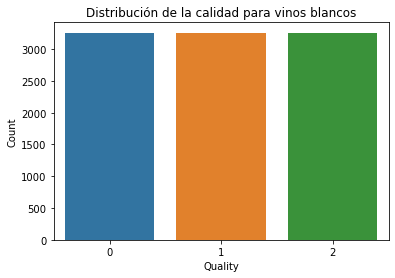

In [19]:
total_samples = len(oversampled_whitewine_df)
label_counts = oversampled_data['quality'].value_counts()
label_proportions = label_counts / total_samples * 100
print(label_proportions)

# Distribución de la calidad
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=oversampled_whitewine_df)
plt.title("Distribución de la calidad para vinos blancos")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

In [20]:
# Separando las características de las etiquetas
X_white = oversampled_whitewine_df.drop('quality', axis=1)
y_white = oversampled_whitewine_df['quality']

In [21]:
# Escalando las características
scaler = StandardScaler()
X_white = scaler.fit_transform(X_white)

In [22]:
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

# Red neuronal con capa salida función sigmoidal

In [23]:
# Definir el procedimiento de k-fold cross validation
k = 5
kfold = KFold(n_splits=k, shuffle=True, random_state=1)

# Almacenar los puntajes de cada iteración
scores = []
accuracy = []
loss = []
val_loss = []
val_accuracy = []

# Convertir a arrays de NumPy
X_white_np = np.array(X_white)
y_white_np = keras.utils.to_categorical(np.array(y_white))

# Loop para cada fold
for train, test in kfold.split(X_white_np):
    # Crear el modelo
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(X_white_np.shape[1],)),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(3, activation="sigmoid")
    ])

    # Compilar el modelo
    model.compile(optimizer='adam', 
                  loss='mean_squared_error', 
                  metrics=['accuracy'])

    # Entrenar el modelo en los datos de entrenamiento
    cl = model.fit(X_white_np[train], y_white_np[train], epochs=80, batch_size=32, verbose=0, validation_split=0.2)
    
    accuracy = cl.history['accuracy']
    loss = cl.history['loss']
    val_loss = cl.history['val_loss']
    val_accuracy = cl.history['val_accuracy']
    
    # Evaluar el modelo en los datos de prueba
    score = model.evaluate(X_white_np[test], y_white_np[test], verbose=0)
    scores.append(score[1])  # Asumimos que queremos la métrica 'accuracy'

# Calcular y imprimir el puntaje promedio
average_score = np.mean(scores)
print('Average score:', average_score)

KeyboardInterrupt: 

62/62 [==============================] - 0s 911us/step


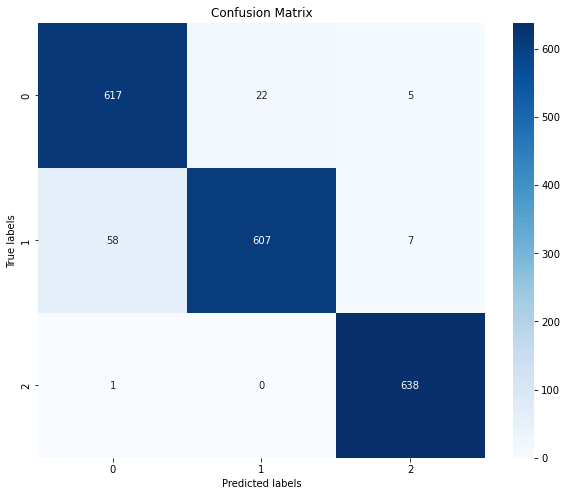

In [ ]:
p_test = model.predict(X_white_test).argmax(axis=1)
cm = tf.math.confusion_matrix(y_white_test, p_test)

cm_array = cm.numpy()

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 8))

# Graficar la matriz de confusión
sns.heatmap(cm_array, annot=True, cmap='Blues', fmt='d', ax=ax)

# Configurar las etiquetas de los ejes
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Mostrar la figura
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(17,8))

plt.plot(accuracy, label='accuracy')
plt.plot(loss,label='loss')
plt.plot(val_accuracy,label='val_accuracy')
plt.plot(val_loss,label='val_loss')
plt.legend()

NameError: name 'plt' is not defined

# Red neuronal con capa salida función tangente hiperbólica